In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
def Simpson(f,a,b,N):
    DeltaX=(b-a)/N
    x=np.zeros(N//2)
    for i in range(0,N//2):
        x[i]=f(a+(2*i-2)*DeltaX)+4*f(a+(2*i-1)*DeltaX)+f(a+(2*i)*DeltaX)
    return (DeltaX/3)*np.sum(x)
    
    

In [3]:
Simpson(lambda x: 1/x, 1, 2, 50000)

0.693167181159964

In [4]:
def laplace(x):
    return np.exp(x)*np.cos(x)

In [5]:
def coeff(it):
    a=np.zeros(it)
    b=np.zeros(it)
    for i in range(1,it+1):
        a[i-1]=Simpson(lambda x: np.exp(x)*np.cos(i*x),-np.pi,np.pi,5000)
        b[i-1]=Simpson(lambda x: np.exp(x)*np.sin(i*x),-np.pi,np.pi,5000)
    return a,b
    

In [6]:
SerCos,SerSin=coeff(20)

In [7]:
SerCos

array([-1.14907620e+01,  4.56151858e+00, -2.25177101e+00,  1.30069879e+00,
       -8.30388682e-01,  5.66280969e-01, -4.03975155e-01,  2.97372322e-01,
       -2.23704102e-01,  1.70716599e-01, -1.31353568e-01,  1.01324331e-01,
       -7.79004213e-02,  5.92806310e-02, -4.42375481e-02,  3.19116634e-02,
       -2.16866963e-02,  1.31115177e-02, -5.84979860e-03, -3.53315398e-04])

In [8]:
SerSin

array([11.54866653, -9.23884583,  6.92902514, -5.43440957,  4.4414587 ,
       -3.74510014,  3.23313725, -2.84218402,  2.53443372, -2.28615086,
        2.08175852, -1.91064163,  1.76533113, -1.64042573,  1.53192624,
       -1.43681027,  1.35275228, -1.27793433,  1.21091518, -1.15053774])

In [9]:
def usol(r,theta,sn,cs):
    s=0
    for i in range(0,len(sn)):
        s=s+cs[i]*np.power(r,i)*np.cos(i*theta)+sn[i]*np.power(r,i)*np.sin(i*theta)
    return s

In [10]:
usol(0,0,SerSin,SerCos)

-11.490762009776436

In [11]:
front=np.linspace(0,2*np.pi,100)
graphfron=np.zeros(100)

In [12]:
for j in range(0,len(front)):
    graphfron[j]=usol(1,front[j],SerSin,SerCos)

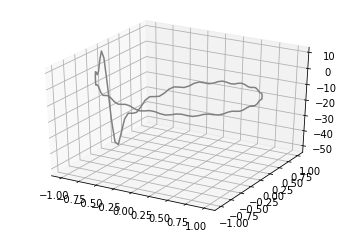

In [13]:
X1=np.cos(front)
Y1=np.sin(front)
Z=graphfron
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(X1,Y1,Z, 'gray')

### Laplace equation $$\nabla ^2 \phi=0$$